In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Importing the training set
dataset_train = pd.read_csv(r"C:\Users\rohan\Desktop\Book1.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [24]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-01,292.750000,295.250000,283.829987,290.390015,290.390015,11932100
1,2018-03-02,284.649994,301.179993,283.230011,301.049988,301.049988,13345300
2,2018-03-05,302.850006,316.910004,297.600006,315.000000,315.000000,18986100
3,2018-03-06,319.880005,325.790009,316.500000,325.220001,325.220001,18525800
4,2018-03-07,320.000000,323.739990,314.549988,321.160004,321.160004,17132200


In [25]:
dataset_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
987,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
988,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
989,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
990,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
991,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [26]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [27]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 991):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [29]:
# Check for NaN values
print(np.isnan(X_train).sum())

# Check for infinite values
print(np.isinf(X_train).sum())


0
0


In [30]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [31]:
# Initializing the RNN
model = Sequential()

In [32]:
# Adding the first LSTM layer and some Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))



In [33]:
# Adding a second LSTM layer and some Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))



In [34]:
# Adding a third LSTM layer and some Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))



In [35]:
# Adding a fourth LSTM layer and some Dropout regularization
model.add(LSTM(units=50))
model.add(Dropout(0.2))


In [36]:
# Adding the output layer
model.add(Dense(units=1))

In [37]:
# Compiling the RNN
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='mean_squared_error')


In [38]:
# Fitting the RNN to the training set
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
30/30 [==============================] - 20s 143ms/step - loss: 0.0437
Epoch 2/100
30/30 [==============================] - 4s 142ms/step - loss: 0.0106
Epoch 3/100
30/30 [==============================] - 4s 142ms/step - loss: 0.0078
Epoch 4/100
30/30 [==============================] - 4s 142ms/step - loss: 0.0071
Epoch 5/100
30/30 [==============================] - 4s 141ms/step - loss: 0.0073
Epoch 6/100
30/30 [==============================] - 4s 134ms/step - loss: 0.0066
Epoch 7/100
30/30 [==============================] - 4s 142ms/step - loss: 0.0076
Epoch 8/100
30/30 [==============================] - 4s 127ms/step - loss: 0.0068
Epoch 9/100
30/30 [==============================] - 4s 136ms/step - loss: 0.0059
Epoch 10/100
30/30 [==============================] - 4s 139ms/step - loss: 0.0062
Epoch 11/100
30/30 [==============================] - 4s 138ms/step - loss: 0.0054
Epoch 12/100
30/30 [==============================] - 4s 135ms/step - loss: 0.0066
Epoch 13/100

In [42]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 991
dataset_test = pd.read_csv(r"C:\Users\rohan\Desktop\book2.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values


In [43]:
# Getting the predicted stock price of 991
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 77):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 95ms/step


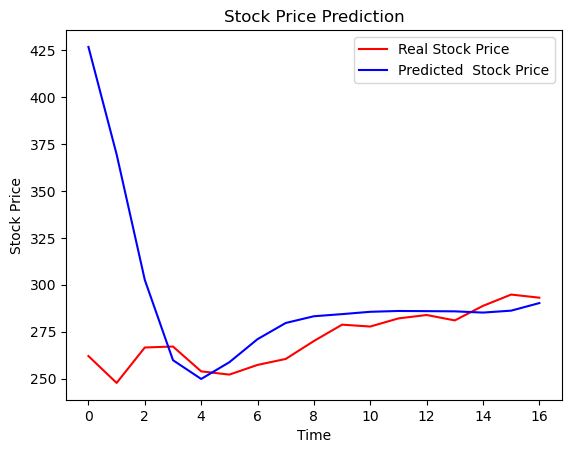

In [44]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted  Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()